In [1]:
#!/usr/bin/env
# -*- coding: UTF-8 -*-

import pandas as pd
from datetime import datetime
import folium
import geopandas as gpd
import pytz

from pandas.api.types import CategoricalDtype

In [2]:
#FUENTE: http://medata.gov.co/dataset/incidentes-viales
df = pd.read_csv('/Users/lauramanuelaosoriog./Desktop/AACIDENTES/datos/incidentes_viales.csv',delimiter=";")

//anaconda2/envs/ipykernel_py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"-75.5688011014, 6.24312304123",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"-75.5693883283, 6.22870030622",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"-75.5503911403, 6.29869502502",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"-75.5442195069, 6.30019383306",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"-75.578180998, 6.21699243701",833903.11,1179469.60


In [4]:
df.columns

Index(['AÑO', 'CBML', 'CLASE_ACCIDENTE', 'DIRECCION', 'DIRECCION ENCASILLADA',
       'DISEÑO', 'EXPEDIENTE', 'FECHA_ACCIDENTE', 'FECHA_ACCIDENTES',
       'GRAVEDAD_ACCIDENTE', 'MES', 'NRO_RADICADO', 'NUMCOMUNA', 'BARRIO',
       'COMUNA', 'LOCATION', 'X', 'Y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270765 entries, 0 to 270764
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AÑO                    270765 non-null  object 
 1   CBML                   252609 non-null  object 
 2   CLASE_ACCIDENTE        270759 non-null  object 
 3   DIRECCION              270765 non-null  object 
 4   DIRECCION ENCASILLADA  270374 non-null  object 
 5   DISEÑO                 269617 non-null  object 
 6   EXPEDIENTE             270655 non-null  object 
 7   FECHA_ACCIDENTE        270765 non-null  object 
 8   FECHA_ACCIDENTES       270765 non-null  object 
 9   GRAVEDAD_ACCIDENTE     270765 non-null  object 
 10  MES                    270765 non-null  int64  
 11  NRO_RADICADO           270760 non-null  object 
 12  NUMCOMUNA              270765 non-null  object 
 13  BARRIO                 251759 non-null  object 
 14  COMUNA                 257967 non-nu

In [6]:
df.shape

(270765, 18)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(270761, 18)

In [9]:
df = df.dropna(axis=0)

In [10]:
df['DISEÑO'].value_counts()

Tramo de via     173470
Interseccion      42400
Lote o Predio     24309
Glorieta           6373
Paso Elevado       1314
Ciclo Ruta          966
Puente              951
Paso Inferior       649
Paso a Nivel        114
Tunel                58
Via peatonal         53
Pontón               23
Pont\xF3n             6
Name: DISEÑO, dtype: int64

In [11]:
df['DISEÑO'] = df['DISEÑO'].replace('Pont\\xF3n', 'Pontón')

In [12]:
df['DISEÑO'].value_counts()

Tramo de via     173470
Interseccion      42400
Lote o Predio     24309
Glorieta           6373
Paso Elevado       1314
Ciclo Ruta          966
Puente              951
Paso Inferior       649
Paso a Nivel        114
Tunel                58
Via peatonal         53
Pontón               29
Name: DISEÑO, dtype: int64

In [13]:
df.shape

(250686, 18)

In [14]:
df['CLASE_ACCIDENTE'].value_counts()

Choque               169383
Otro                  26919
Atropello             23556
Caida Ocupante        15864
Volcamiento            9190
Caída de Ocupante      5745
Incendio                 29
Name: CLASE_ACCIDENTE, dtype: int64

In [15]:
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].replace('Caída Ocupante'   , 'Caida Ocupante')
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].replace('Caida de Ocupante', 'Caida Ocupante')
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].replace('Caída de Ocupante', 'Caida Ocupante')

In [16]:
df['CLASE_ACCIDENTE'].value_counts()

Choque            169383
Otro               26919
Atropello          23556
Caida Ocupante     21609
Volcamiento         9190
Incendio              29
Name: CLASE_ACCIDENTE, dtype: int64

In [17]:
df['GRAVEDAD_ACCIDENTE'].value_counts()

Con heridos      137965
Solo daños        93164
Solo da\xF1os     19231
Con muertos         326
Name: GRAVEDAD_ACCIDENTE, dtype: int64

In [18]:
df['GRAVEDAD_ACCIDENTE'] = df['GRAVEDAD_ACCIDENTE'].replace('Solo da\\xF1os', 'Solo daños')

In [19]:
df['GRAVEDAD_ACCIDENTE'].value_counts()

Con heridos    137965
Solo daños     112395
Con muertos       326
Name: GRAVEDAD_ACCIDENTE, dtype: int64

In [20]:
df['COMUNA'].value_counts()

La Candelaria                                    51941
Laureles Estadio                                 26957
Castilla                                         24795
El Poblado                                       21662
Guayabal                                         18418
Robledo                                          16459
Aranjuez                                         14290
Belén                                            14058
Buenos Aires                                      9852
Manrique                                          7734
Doce de Octubre                                   6863
Villa Hermosa                                     6690
La América                                        6670
San Javier                                        4294
Corregimiento de San Antonio de Prado             4007
Popular                                           3700
Santa Cruz                                        3423
Bel\xE9n                                          2675
Corregimie

In [21]:
df['COMUNA'] = df['COMUNA'].replace('Bel\\xE9n', 'Belén')
df['COMUNA'] = df['COMUNA'].replace('La Am\\xE9rica', 'La América')
df['COMUNA'] = df['COMUNA'].replace('Corregimiento de San Crist\\xF3bal', 'Corregimiento de San Cristóbal')
df['COMUNA'] = df['COMUNA'].replace('Corregimiento de San Sebasti\\xE1n de Palmitas', 'Corregimiento de San Sebastián de Palmitas')

In [22]:
df['COMUNA'].value_counts()

La Candelaria                                 51941
Laureles Estadio                              26957
Castilla                                      24795
El Poblado                                    21662
Guayabal                                      18418
Belén                                         16733
Robledo                                       16459
Aranjuez                                      14290
Buenos Aires                                   9852
La América                                     8022
Manrique                                       7734
Doce de Octubre                                6863
Villa Hermosa                                  6690
San Javier                                     4294
Corregimiento de San Antonio de Prado          4007
Popular                                        3700
Santa Cruz                                     3423
Corregimiento de San Cristóbal                 2607
0                                              1018
Corregimient

In [23]:
df = df.drop(df[ (df.COMUNA == 0) | (df.COMUNA == 'In') | (df.COMUNA == 'AU') | 
                 (df.COMUNA == 'SN') | (df.COMUNA == '0') |(df.COMUNA == '0')  |  
                 (df.COMUNA == 'No Georef') |(df.COMUNA == 'Sin Inf') 
               ].index)

In [24]:
df['COMUNA'].value_counts()

La Candelaria                                 51941
Laureles Estadio                              26957
Castilla                                      24795
El Poblado                                    21662
Guayabal                                      18418
Belén                                         16733
Robledo                                       16459
Aranjuez                                      14290
Buenos Aires                                   9852
La América                                     8022
Manrique                                       7734
Doce de Octubre                                6863
Villa Hermosa                                  6690
San Javier                                     4294
Corregimiento de San Antonio de Prado          4007
Popular                                        3700
Santa Cruz                                     3423
Corregimiento de San Cristóbal                 2607
Corregimiento de Santa Elena                    598
Corregimient

In [82]:
df['BARRIO'].value_counts().nlargest(50)

La Candelaria                    5901
Campo Amor                       5142
Perpetuo Socorro                 5093
Caribe                           4866
Los Conquistadores               4108
Cabecera San Antonio de Prado    3767
Villa Nueva                      3726
Barrio Colón                     3674
San Benito                       3538
Guayaquil                        3527
Carlos E. Restrepo               3342
San Diego                        3275
Santa Fé                         3249
Naranjal                         3243
Terminal de Transporte           3203
Castilla                         2908
Los Colores                      2792
Boston                           2760
La Alpujarra                     2760
Villa Carlota                    2628
Guayabal                         2597
Belén                            2464
Cristo Rey                       2366
Prado                            2345
La Aguacatala                    2342
Corazón de Jesús                 2256
El Chagualo 

# Análisis 

# Análisis temporal

In [26]:
df['FECHA_ACCIDENTES']

0         2015-10-21T10:58:00.000Z
1         2015-11-05T08:00:00.000Z
2         2015-10-21T12:40:00.000Z
3         2015-10-21T17:00:00.000Z
4         2015-11-03T11:16:00.000Z
                    ...           
270760    2020-08-31T23:50:00.000Z
270761    2020-08-31T23:50:00.000Z
270762    2020-09-01T00:05:00.000Z
270763    2020-09-01T00:30:00.000Z
270764    2020-09-01T02:45:00.000Z
Name: FECHA_ACCIDENTES, Length: 249626, dtype: object

In [27]:
import dateutil.parser
from dateutil.tz import gettz



df.FECHA_ACCIDENTES = df.FECHA_ACCIDENTES.apply(lambda x :dateutil.parser.isoparse(x))

In [28]:
df.FECHA_ACCIDENTES = df.FECHA_ACCIDENTES.apply(lambda x:  x.astimezone( gettz('EST')))

In [29]:
df.FECHA_ACCIDENTES

0        2015-10-21 05:58:00-05:00
1        2015-11-05 03:00:00-05:00
2        2015-10-21 07:40:00-05:00
3        2015-10-21 12:00:00-05:00
4        2015-11-03 06:16:00-05:00
                    ...           
270760   2020-08-31 18:50:00-05:00
270761   2020-08-31 18:50:00-05:00
270762   2020-08-31 19:05:00-05:00
270763   2020-08-31 19:30:00-05:00
270764   2020-08-31 21:45:00-05:00
Name: FECHA_ACCIDENTES, Length: 249626, dtype: datetime64[ns, tzfile('/usr/share/zoneinfo/EST')]

//anaconda2/envs/ipykernel_py3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


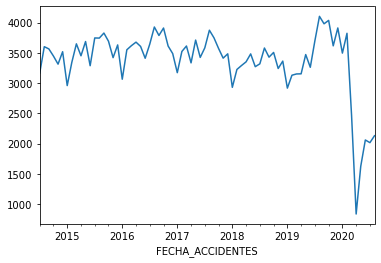

In [30]:
mes = df['FECHA_ACCIDENTES'].dt.to_period('M')

accidentes_mes = df.groupby(mes).size().plot()

In [31]:
max(df['FECHA_ACCIDENTES'])

Timestamp('2020-08-31 21:45:00-0500', tz='dateutil//usr/share/zoneinfo/EST')

In [32]:
df['FECHA_ACCIDENTES'].dt.hour

0          5
1          3
2          7
3         12
4          6
          ..
270760    18
270761    18
270762    19
270763    19
270764    21
Name: FECHA_ACCIDENTES, Length: 249626, dtype: int64

<AxesSubplot:xlabel='FECHA_ACCIDENTES'>

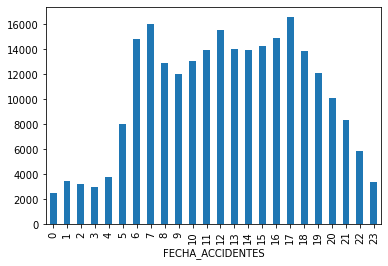

In [33]:
accidentes_por_hora = df.groupby(df['FECHA_ACCIDENTES'].dt.hour).size()
accidentes_por_hora.plot.bar()

In [34]:
df['DIA'] = df['FECHA_ACCIDENTES'].dt.day_name()

In [35]:
month_to_int = {'Monday':'Lunes','Tuesday':'Martes','Wednesday':'Miercoles','Thursday':
                'Jueves','Friday':'Viernes','Saturday':'Sabado','Sunday':'Domingo'}

In [36]:
df['DIA'].replace(month_to_int,inplace=True)

In [37]:
df['DIA']

0         Miercoles
1            Jueves
2         Miercoles
3         Miercoles
4            Martes
            ...    
270760        Lunes
270761        Lunes
270762        Lunes
270763        Lunes
270764        Lunes
Name: DIA, Length: 249626, dtype: object

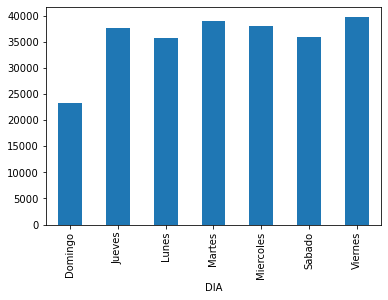

In [38]:
dia_accidentes = df.groupby(df['DIA'],
                            ).size().plot(kind='bar')

# Número de accidentes por cada Barrio.

<AxesSubplot:xlabel='COMUNA'>

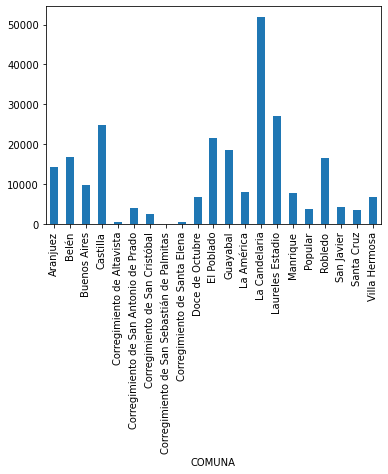

In [39]:
boroughs = df.groupby('COMUNA').size()
boroughs.plot.bar()

<AxesSubplot:xlabel='COMUNA'>

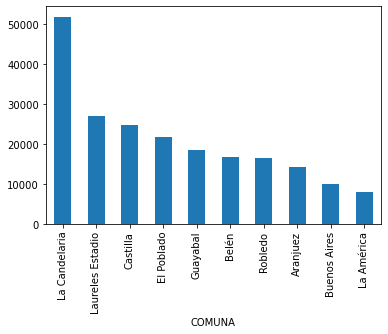

In [40]:
df.groupby('COMUNA').CBML.count().nlargest(10).plot(kind='bar')

<AxesSubplot:xlabel='BARRIO'>

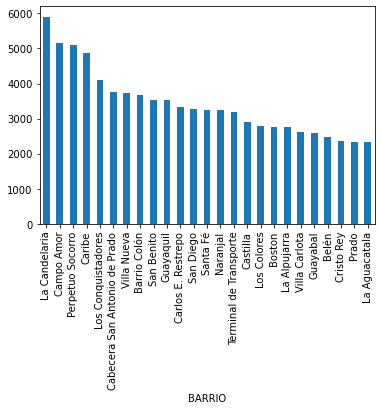

In [89]:
df.groupby('BARRIO').size().nlargest(25).plot(kind= 'bar')

<AxesSubplot:xlabel='GRAVEDAD_ACCIDENTE,BARRIO'>

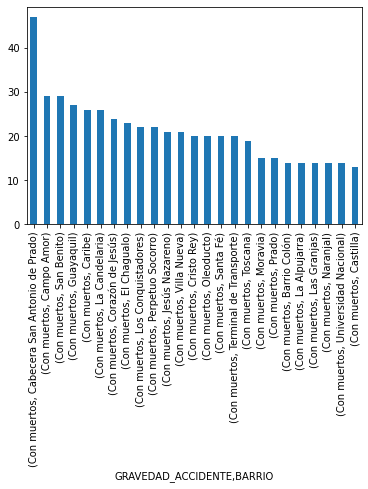

In [110]:
df.loc[df.GRAVEDAD_ACCIDENTE =='Con muertos'].groupby(['GRAVEDAD_ACCIDENTE','BARRIO']).size().nlargest(25).plot(kind='bar')

In [41]:
#grafica de accidentes en barrios por area cuadrada

# Análisis Geoespacial

In [55]:
import folium

# Mapa centrado en  MEDELLLIN
mapa_Medellin = folium.Map(location=[6.2518400, -75.5635900], zoom_start=12)


# Display the map
mapa_Medellin

In [43]:
df.LOCATION.dtype

dtype('O')

In [44]:
df.LOCATION 

0         -75.5688011014, 6.24312304123
1         -75.5693883283, 6.22870030622
2         -75.5503911403, 6.29869502502
3         -75.5442195069, 6.30019383306
4          -75.578180998, 6.21699243701
                      ...              
270760    -75.5731343044, 6.26063534822
270761    -75.5902062951, 6.26040455473
270762    -75.5735398111, 6.27625838886
270763    -75.5515085985, 6.29359892373
270764     -75.5533856947, 6.2717784831
Name: LOCATION, Length: 249626, dtype: object

In [45]:
df[['LONGITUD','LATITUD']] = df['LOCATION'].str.split(pat = ',', expand = True)

In [46]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,...,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y,DIA,LONGITUD,LATITUD
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21 05:58:00-05:00,Con heridos,...,1508668,10,Barrio Colón,La Candelaria,"-75.5688011014, 6.24312304123",834949.69,1182357.34,Miercoles,-75.5688011014,6.24312304123
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05 03:00:00-05:00,Solo daños,...,1510621,10,San Diego,La Candelaria,"-75.5693883283, 6.22870030622",834880.17,1180762.02,Jueves,-75.5693883283,6.22870030622
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21 07:40:00-05:00,Con heridos,...,1508691,02,La Francia,Santa Cruz,"-75.5503911403, 6.29869502502",837004.94,1188499.17,Miercoles,-75.5503911403,6.29869502502
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21 12:00:00-05:00,Con heridos,...,1508694,01,Santo Domingo Savio No. 1,Popular,"-75.5442195069, 6.30019383306",837688.53,1188663.05,Miercoles,-75.5442195069,6.30019383306
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03 06:16:00-05:00,Solo daños,...,1510634,15,Santa Fé,Guayabal,"-75.578180998, 6.21699243701",833903.11,1179469.60,Martes,-75.578180998,6.21699243701


In [47]:
df = df.astype({'LONGITUD':'float','LATITUD':'float'})

In [48]:
df.LONGITUD.dtype

dtype('float64')

In [49]:
df.GRAVEDAD_ACCIDENTE.dtype

dtype('O')

In [56]:
for lat, lng, label in zip(df.LATITUD, df.LONGITUD, df.GRAVEDAD_ACCIDENTE):
    if label =='Con muertos':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(mapa_Medellin)
        
        
mapa_Medellin